In [16]:
%matplotlib inline

In [17]:
from math import ceil, e, log
import hashlib

import matplotlib.pyplot as plt
import numpy as np

In [38]:
def _hash(message: str, index: int) -> int:
    message = f"{message}-{index}"
    digest = hashlib.md5(message.encode()).hexdigest()
    return int(digest, 16)

In [53]:
class Sketch:
    def __init__(self, epsilon, delta):
        self.width = ceil(e/epsilon)
        self.depth = ceil(-log(delta))
        self._sketch = np.zeros((self.depth, self.width), dtype=int)
        
    def count(self, element):
        for i in range(self.depth):
            h = _hash(element, i)
            self._sketch[i, h % self.width] += 1
            
    def estimate(self, element):
        return min(self._sketch[i, _hash(element, i) % self.width]
                   for i in range(self.depth))
    
    @property
    def size(self):
        return self._sketch.shape

In [73]:
s = Sketch(0.05, 0.01)

In [55]:
for _ in range(10):
    s.count("foo")
    s.count("bar")
    s.count("baz")
    s.count("foo")
    s.count("foo")

In [56]:
s._sketch.sum(axis=1)

array([50, 50, 50, 50, 50])

In [57]:
s.estimate("foo")

30

In [58]:
s.estimate("bar")

10

In [59]:
s.estimate("baz")

10

In [87]:
prng = np.random.RandomState(1234)

In [88]:
s = Sketch(0.01, 0.05)
data = prng.randint(0, 1000, 10000)

for d in data:
    s.count(d)

In [89]:
s.size

(3, 272)

In [90]:
from collections import Counter

exact = Counter(data)

In [93]:
errors = []
for value, count in exact.items():
    error = s.estimate(value) - count
    errors.append(error)

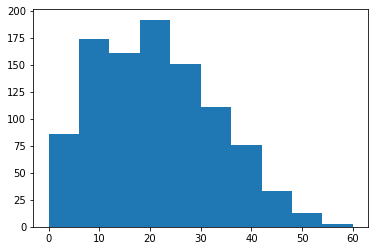

In [94]:
plt.hist(errors)

pass

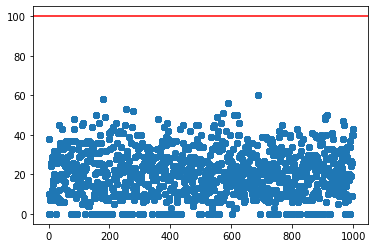

In [99]:
errors = [s.estimate(d) - exact[d] for d in data]

plt.plot(data, errors, 'o')
plt.axhline(100, color="red")